In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housesalesprediction/kc_house_data.csv


In [2]:
#pytorch and tensor flow

In [3]:
pd.set_option('max_columns',None)

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('../input/housesalesprediction/kc_house_data.csv')

In [6]:
data['zipcode'].nunique()

70

In [7]:
data.isna().sum().sum()

0

In [8]:
def preprocessing(df):
    df=df.copy()
    df_dummies = pd.DataFrame
    df_dummies = pd.get_dummies(data['zipcode'],prefix='zip')
    df = pd.concat([df,df_dummies],axis=1)
    df['year'] = df['date'].apply(lambda x: x[0:4])
    df['month'] = df['date'].apply(lambda x: x[4:6])
    df.drop(['id','date','zipcode','yr_renovated'],axis=1,inplace=True)
    X = df.drop('price',axis=1)
    y=df['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)
    return X_train, X_test, y_train, y_test

In [9]:
X_train, X_test, y_train, y_test = preprocessing(data)

In [10]:
X_train.shape

(17290, 88)

In [11]:
# TF

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [13]:
model = Sequential()
model.add(Dense(88,activation='relu'))
model.add(Dense(44,activation='relu'))
model.add(Dense(22,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(optimizer = 'adam',loss='mse')
early_stop = EarlyStopping(monitor='val_loss', mode='min',verbose=1,patience=25)

2022-06-30 13:37:38.157091: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [14]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=32,epochs=10,callbacks=[early_stop],verbose=0)

2022-06-30 13:37:38.414853: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [15]:
history = pd.DataFrame(model.history.history)

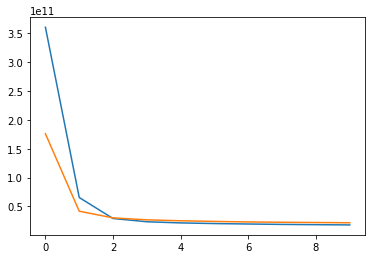

In [16]:
plt.plot(history)

In [17]:
y_pred = model.predict(X_test)

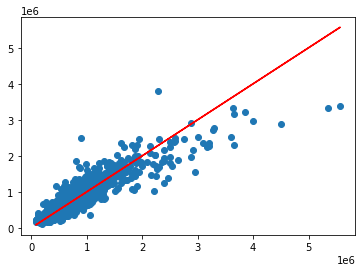

In [18]:
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test,color='r')

In [19]:
np.sqrt(model.evaluate(X_test,y_test))

136/136 [==============================] - 0s 2ms/step - loss: 21853603840.0000


147829.644658979

In [20]:
y_test.mean()

549367.443673375

In [21]:
#Pytorch

In [22]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net,self).__init__()
        self.layer1 = nn.Linear(88,64)
        self.layer2 = nn.Linear(64,64)
        self.out = nn.Linear(64,1)
    def forward(self,x):
        x=F.relu(self.layer1(x))
        x=F.relu(self.layer2(x))
        x=self.out(x)
        return x
net = Net()

In [23]:
list(net.parameters())

[Parameter containing:
 tensor([[ 0.0548,  0.0073,  0.0761,  ...,  0.0524, -0.0823,  0.0317],
         [-0.0645,  0.0471, -0.1010,  ...,  0.0959,  0.0574, -0.0604],
         [-0.0624,  0.0608, -0.0327,  ...,  0.0699, -0.0192,  0.0485],
         ...,
         [ 0.0824,  0.0189, -0.0004,  ...,  0.0246,  0.0877,  0.0170],
         [ 0.1006, -0.0058, -0.0318,  ..., -0.0667, -0.0578, -0.0168],
         [ 0.0514, -0.0169,  0.0016,  ..., -0.1048, -0.0367, -0.0652]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0677,  0.0184,  0.0192,  0.0744,  0.0907, -0.0192,  0.0566,  0.0751,
          0.0257, -0.0733,  0.0653, -0.0999,  0.0158, -0.0649,  0.0543,  0.0117,
          0.0504, -0.0429,  0.0608,  0.0189,  0.0910, -0.0136,  0.0384, -0.1008,
          0.0112, -0.0244,  0.0302,  0.0212,  0.0392, -0.0333, -0.0775,  0.0265,
          0.0809,  0.0196, -0.0029,  0.0713, -0.0640,  0.0693, -0.0817,  0.0341,
         -0.0963, -0.0469,  0.0796, -0.0563, -0.0690,  0.0432,  0.0750,  0.1049

In [24]:
PT_X_train = torch.tensor(X_train.values).type(torch.float32)

In [25]:
PT_y_train = torch.tensor(y_train.values).type(torch.float32)

In [26]:
PT_X_test = torch.tensor(X_test.values).type(torch.float32)

In [27]:
PT_y_test = torch.tensor(y_test.values).type(torch.float32)

In [28]:
optimizer = torch.optim.Adam(net.parameters(),lr=0.01)
criterion = nn.MSELoss()

In [29]:
for x, target in zip(PT_X_train,PT_y_train):
    optimizer.zero_grad()
    output = net(x)
    loss=criterion(output,target)
    loss.backward()
    optimizer.step()

/opt/conda/lib/python3.7/site-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [30]:
total_loss = 0
for x, target in zip(PT_X_test,PT_y_test):
    output = net(x)
    loss=criterion(output,target)
    total_loss+=loss
avg_loss = total_loss/len(PT_X_test)

In [31]:
torch.sqrt(avg_loss)

tensor(209941.0312, grad_fn=<SqrtBackward0>)